<a href="https://colab.research.google.com/github/tushargarg18/Computational_Intelligence/blob/main/lab_4_stud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent neural networks

# Task 1

Get IBM stock market data and evaluate prediction on a set of recurrent neural networks.

Dataset can be downloaded from https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231



## Subtask 1

Load data and prepare the dataset

In [18]:
# Write your code here
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
def show_training(history):
  import matplotlib.pyplot as plt
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/IBM_2006-01-01_to_2018-01-01.csv')

print(df.head())

         Date   Open   High    Low  Close    Volume Name
0  2006-01-03  82.45  82.55  80.81  82.06  11715200  IBM
1  2006-01-04  82.20  82.50  81.33  81.95   9840600  IBM
2  2006-01-05  81.40  82.90  81.00  82.50   7213500  IBM
3  2006-01-06  83.95  85.03  83.41  84.95   8197400  IBM
4  2006-01-09  84.10  84.25  83.38  83.73   6858200  IBM


In [22]:
print(df.describe())

              Open         High          Low        Close        Volume
count  3019.000000  3020.000000  3019.000000  3020.000000  3.020000e+03
mean    145.515545   146.681738   144.471597   145.617278  5.773301e+06
std      37.554946    37.613446    37.477641    37.529387  3.192831e+06
min      72.740000    73.940000    69.500000    71.740000  2.542560e+05
25%     116.405000   117.765000   115.490000   116.525000  3.622681e+06
50%     149.610000   150.330000   148.470000   149.315000  4.928852e+06
75%     178.445000   179.762500   177.330000   178.685000  6.965014e+06
max     215.380000   215.900000   214.300000   215.800000  3.077428e+07


In [47]:
import math

d = np.array(df['Low'])

for i in range(len(d)):
  if math.isnan(d[i]):
    print('Error', i)
    d[i] = (d[i-1] + d[i+1])/2
    print('new value', d[i])

Error 2913
new value 144.28


In [48]:
print(np.isnan(d).sum())

0


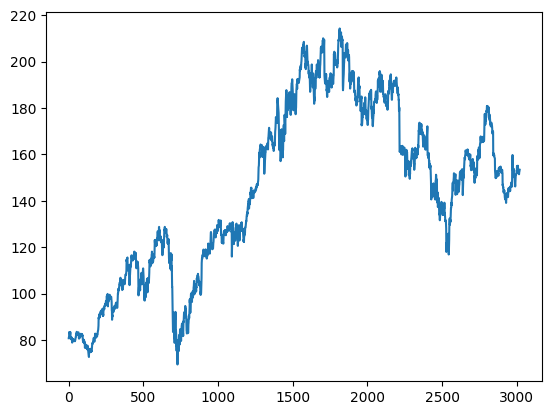

In [49]:
plt.plot(d)
plt.show()

In [50]:
window_size = 10
epochs = 10

# Subtask 2

Perform prediction by using feed-forward neural network (sliding window)

In [51]:
dx = np.asarray(d, dtype = np.float32)
print(dx)
m = np.max(dx)
print(m)
x = d/m
print(x)

[ 80.81  81.33  81.   ... 152.61 153.2  153.42]
214.3
[0.37708819 0.37951469 0.3779748  ... 0.71213251 0.71488566 0.71591226]


In [52]:
in_data = np.zeros((len(x)-window_size, window_size))
out_data = np.zeros((len(x)-window_size, 1))
for i in range(len(d) - window_size):
  in_data[i] = x[i:i+window_size]
  out_data[i] = x[i+window_size: i+window_size+1]

In [53]:
print(in_data.shape, out_data.shape)
print(in_data[:4], out_data[:4])

(3010, 10) (3010, 1)
[[0.37708819 0.37951469 0.3779748  0.38922071 0.38908072 0.38786747
  0.38917405 0.38917405 0.38497433 0.38516098]
 [0.37951469 0.3779748  0.38922071 0.38908072 0.38786747 0.38917405
  0.38917405 0.38497433 0.38516098 0.38973401]
 [0.3779748  0.38922071 0.38908072 0.38786747 0.38917405 0.38917405
  0.38497433 0.38516098 0.38973401 0.38740083]
 [0.38922071 0.38908072 0.38786747 0.38917405 0.38917405 0.38497433
  0.38516098 0.38973401 0.38740083 0.37914139]] [[0.38973401]
 [0.38740083]
 [0.37914139]
 [0.37760149]]


In [54]:
from sklearn.model_selection import train_test_split


# for the time series data it may be a good idea to do spliting sequentially to prevent data leakage
x_train, x_test, y_train, y_test = train_test_split(in_data, out_data, test_size = 0.2, random_state = 42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2408, 10) (2408, 1)
(602, 10) (602, 1)


In [57]:
from tensorflow.keras import layers, models

model = models.Sequential([

  layers.Input(shape = (window_size,)),
  layers.Dense(20, activation = 'sigmoid'),
  layers.Dense(40, activation = 'sigmoid'),
  layers.Dense(1, activation = 'relu'),
])

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, batch_size = 8, shuffle = True, validation_split = 0.2)

Epoch 1/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 6.5801e-05 - loss: 0.0715 - val_accuracy: 0.0000e+00 - val_loss: 0.0194
Epoch 2/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 2.6743e-04 - loss: 0.0152 - val_accuracy: 0.0000e+00 - val_loss: 0.0070
Epoch 3/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 2.8934e-04 - loss: 0.0044 - val_accuracy: 0.0000e+00 - val_loss: 0.0013
Epoch 4/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 5.4456e-04 - loss: 8.7800e-04 - val_accuracy: 0.0000e+00 - val_loss: 5.2788e-04
Epoch 5/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 2.9308e-04 - loss: 5.0557e-04 - val_accuracy: 0.0000e+00 - val_loss: 5.4046e-04
Epoch 6/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 2.0362e-04 - loss: 4.3285e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.6875e-04
Epoch 7/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 3.9216e-04 - loss: 4.5144e-04 - val_accuracy: 0.0000e+00 - val_loss: 5.8673e-04
Epoch 8/20
241/2

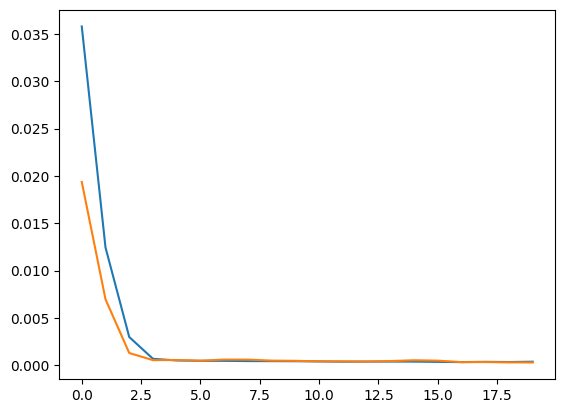

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 2.2333e-04 
[0.00021828047465533018, 0.0]
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
(602, 1)


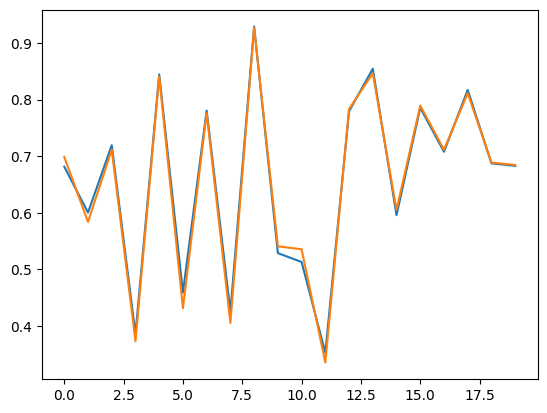

In [59]:
def check(model, x_test, y_test):
  eval = model.evaluate(x_test, y_test)
  print(eval)

  pred = model.predict(x_test)
  print(pred.shape)

  test_sub = 20
  plt.plot(y_test[:test_sub])
  plt.plot(pred[:test_sub])
  plt.show()

check(model, x_test, y_test)


## Subtask 3

Perform prediction by using RNN

In [72]:
rnn_model = models.Sequential([
    layers.Input(shape = (window_size,1)),
    layers.SimpleRNN(32, activation = 'tanh'),
    layers.Dense(1, activation='linear')
])

rnn_model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

history = rnn_model.fit(x_train, y_train, batch_size = 8, epochs = 75, shuffle = True, validation_split = 0.2)

Epoch 1/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0010 - loss: 0.1903 - val_accuracy: 0.0000e+00 - val_loss: 0.0011
Epoch 2/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 3.9851e-05 - loss: 0.0010 - val_accuracy: 0.0000e+00 - val_loss: 0.0014
Epoch 3/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 3.0065e-04 - loss: 7.5396e-04 - val_accuracy: 0.0000e+00 - val_loss: 9.1142e-04
Epoch 4/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 3.7868e-04 - loss: 5.4353e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.7510e-04
Epoch 5/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 2.2293e-04 - loss: 4.5155e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0010
Epoch 6/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0343e-04 - loss: 4.5852e-04 - val_accuracy: 0.0000e+00 - val_loss: 9.1235e-04
Epoch 7/75
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 4.4988e-04 - loss: 4.8893e-04 - val_accuracy: 0.0000e+00 - val_loss: 3.0263e-04
Epoch 8/75
241/2

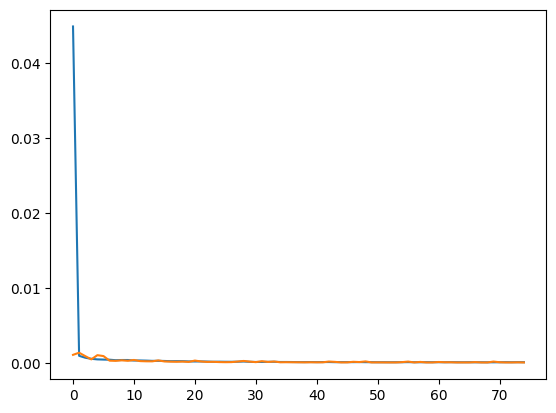

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 5.5109e-05 
[5.066163794253953e-05, 0.0]
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
(602, 1)


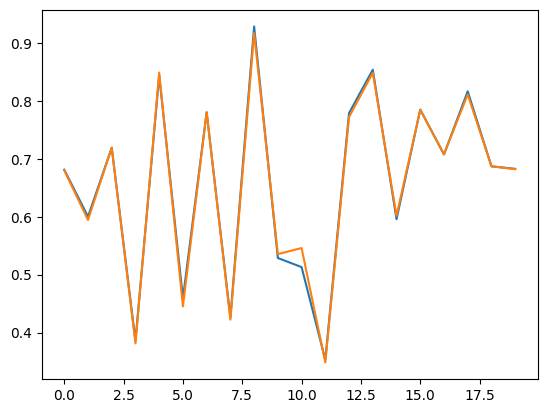

In [74]:
check(rnn_model, x_test, y_test)

## Subtask 4

Perform prediction by using LSTM

In [75]:
lstm_model = models.Sequential([
    layers.Input(shape = (window_size,1)),
    layers.LSTM(4, activation = 'relu'),
    layers.Dense(1, activation='linear')
])

lstm_model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

history = lstm_model.fit(x_train, y_train, batch_size = 20, epochs = 75, shuffle = True, validation_split = 0.2)

Epoch 1/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 2.0056e-04 - loss: 0.0787 - val_accuracy: 0.0000e+00 - val_loss: 0.0011
Epoch 2/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 2.7475e-04 - loss: 9.3780e-04 - val_accuracy: 0.0000e+00 - val_loss: 6.3034e-04
Epoch 3/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.9295e-04 - loss: 5.9501e-04 - val_accuracy: 0.0000e+00 - val_loss: 3.7574e-04
Epoch 4/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 6.1524e-04 - loss: 3.1777e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.6418e-04
Epoch 5/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 4.6632e-04 - loss: 2.4689e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.2185e-04
Epoch 6/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 9.6789e-05 - loss: 2.0903e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.1298e-04
Epoch 7/75
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.9295e-04 - loss: 2.3287e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.1160e-04
Epoch 8/75
9

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 9.4714e-05 
[9.00254599400796e-05, 0.0]
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
(602, 1)


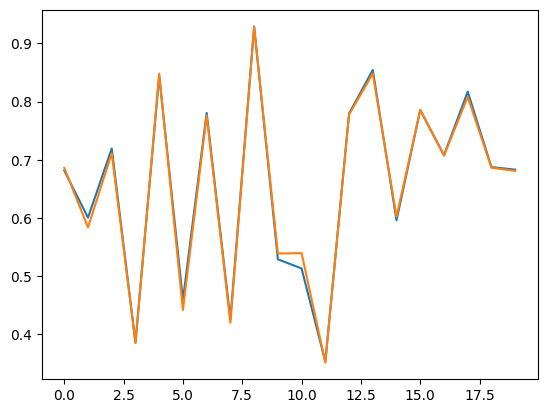

In [76]:
check(lstm_model, x_test, y_test)

In [77]:
lstms_model = models.Sequential([
    layers.Input(shape = (window_size,1)),
    layers.LSTM(4, activation = 'relu', return_sequences = True),
    layers.LSTM(4, activation = 'relu'),
    layers.Dense(1, activation='linear')
])

lstms_model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

history = lstms_model.fit(x_train, y_train, batch_size = 20, epochs = epochs, shuffle = True, validation_split = 0.2)

print(model.summary())

Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.0000e+00 - loss: 0.3222 - val_accuracy: 0.0000e+00 - val_loss: 0.0033
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 4.5357e-04 - loss: 0.0035 - val_accuracy: 0.0000e+00 - val_loss: 0.0021
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 2.0056e-04 - loss: 0.0019 - val_accuracy: 0.0000e+00 - val_loss: 0.0014
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0011 - loss: 0.0014 - val_accuracy: 0.0000e+00 - val_loss: 6.9833e-04
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 7.8346e-05 - loss: 6.0957e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.7984e-04
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 5.6583e-04 - loss: 4.4458e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.0928e-04
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 2.0056e-04 - loss: 3.7344e-04 - val_accuracy: 0.0000e+00 - val_loss: 3.4759e-04
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 40)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305 (12.91 KB)

 Trainable params: 1,101 (4.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,204 (8.61 KB)

None


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 1.7843e-04
[0.00017642986495047808, 0.0]
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
(602, 1)


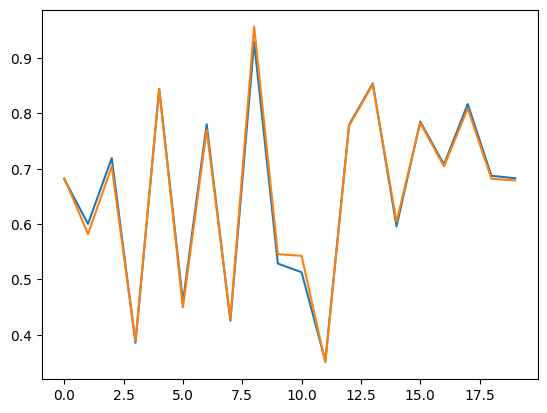

In [78]:
check(lstms_model, x_test, y_test)

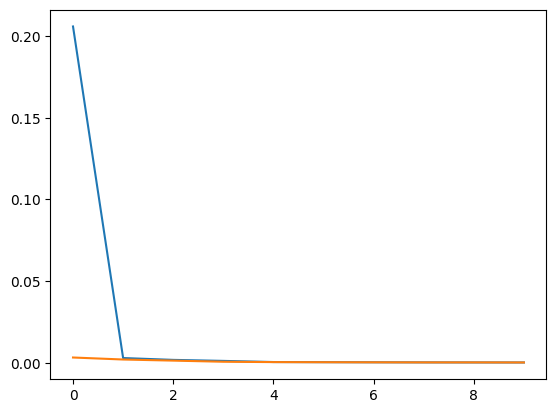

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [80]:

gru_model = models.Sequential([
    layers.Input(shape=(window_size, 1)),
    layers.GRU(10, return_sequences=True),   # returns the full sequence
    layers.GRU(10, return_sequences=False, return_state = False),                          # returns only the final output
    layers.Dense(1, activation='linear')
])

gru_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = gru_model.fit(
    x_train, y_train,
    batch_size=20,
    epochs=epochs,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.0000e+00 - loss: 0.1540 - val_accuracy: 0.0000e+00 - val_loss: 0.0060
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 4.1711e-04 - loss: 0.0053 - val_accuracy: 0.0000e+00 - val_loss: 0.0030
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 3.6160e-04 - loss: 0.0024 - val_accuracy: 0.0000e+00 - val_loss: 8.8923e-04
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.7076e-04 - loss: 6.8070e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.6837e-04
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 4.6632e-04 - loss: 2.0943e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.0119e-04
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 7.5343e-04 - loss: 1.9849e-04 - val_accuracy: 0.0000e+00 - val_loss: 1.9753e-04
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 6.6411e-05 - loss: 1.8525e-04 - val_accuracy: 0.0000e+00 - val_loss: 1.9593e-04
Epoch 8/10
97/97 ━━

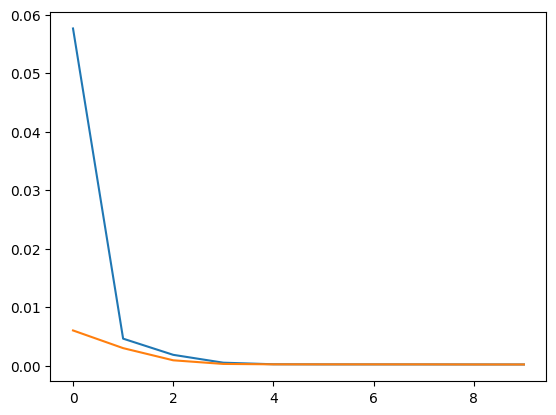

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 1.3036e-04
[0.00012708466965705156, 0.0]
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
(602, 1)


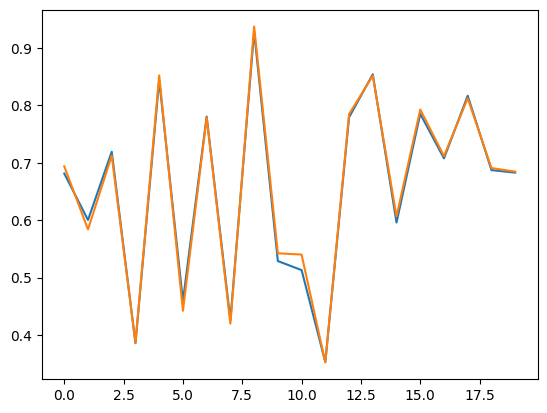

In [82]:
check(gru_model, x_test, y_test)

## Subtask 5

Compare all above results by using MSE error and dermine the best architecture. You can do tests on more stock data than IBM.